# P3.4 - prezentacja rozwiązania
Aleksander Czeszejko-Sochacki
<br>
Sławomir Górawski

In [1]:
macro javascript_str(s)
    display("text/javascript", s)
end

javascript"""
IPython.OutputArea.prototype._should_scroll = function(lines) { return false; }
"""

In [2]:
using Images
using TestImages
using PyPlot

include("program.jl");

---
## Testy

In [3]:
function show_grayscale_image(img::Matrix, name::String,
                              resolution::Tuple{Int, Int})
    imshow(img, cmap="gray")
    title(ucfirst(name))
    xlabel("$resolution")
    
    # Redundant tickmarks and labels removal
    setp(gca()[:get_xticklabels](), visible=false)
    setp(gca()[:get_xaxis](), ticks=[])
    setp(gca()[:get_yaxis](), visible=false)
end;

In [4]:
function test_and_plot_results(img::Matrix, new_x::Int, new_y::Int)
    # Casting image to raw matrix of floats
    raw_img = Float64.(img)
    
    for (first_orientation, orientation_name) in
            zip([horizontal, vertical], ["horizontal", "vertical"])
        
        # Plot setup
        figure(figsize=(10, 10))
        suptitle("$(ucfirst(orientation_name))-first methods comparison",
                 fontweight="bold", fontsize=20)
        
        # Original image presentation
        subplot(2, 2, 1)
        show_grayscale_image(raw_img, "original image", size(raw_img))
        
        for (i, (method, method_name)) in 
                enumerate(zip([nearest_neighbours, linear_spline, cubic_spline],
                ["nearest neighbours", "linear spline", "cubic spline"]))
            resized_img = resize(raw_img, new_x, new_y, method, horizontal)
            
            # Resized image presentation
            subplot(2, 2, i + 1)
            show_grayscale_image(resized_img, method_name, (new_x, new_y))
        end
        tight_layout(rect=[0, 0.03, 1, 0.93])
    end
end;

---
## Przykłady

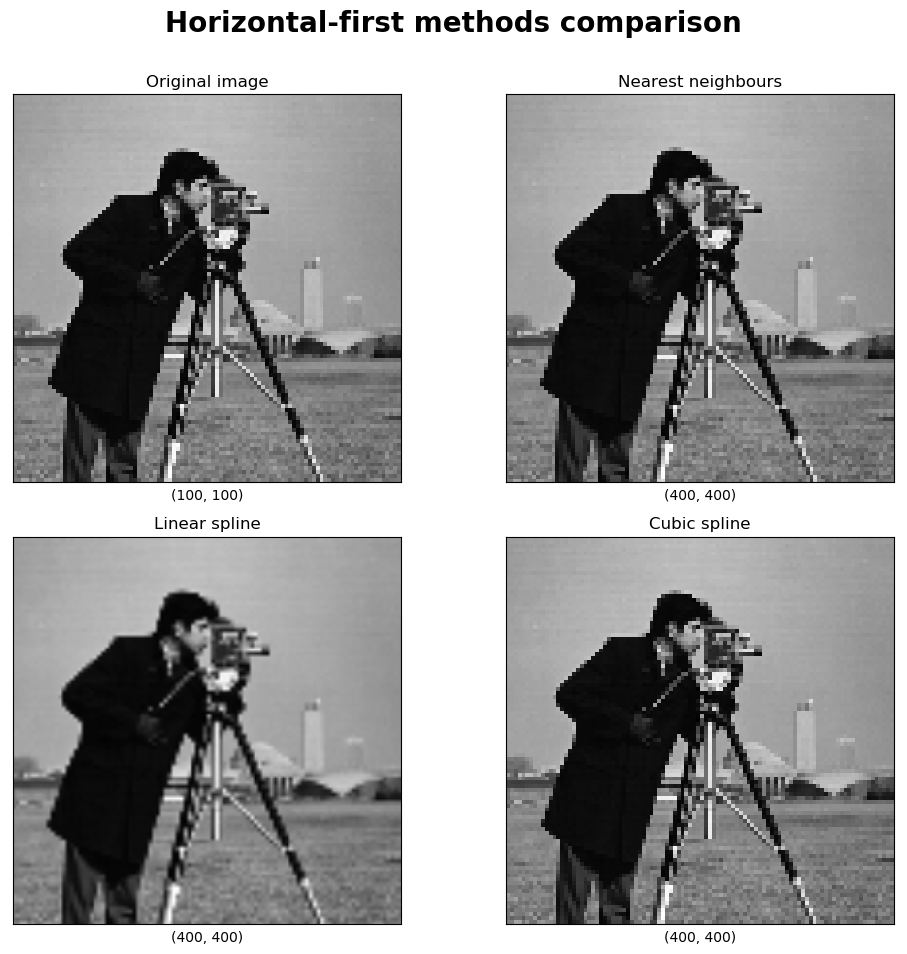

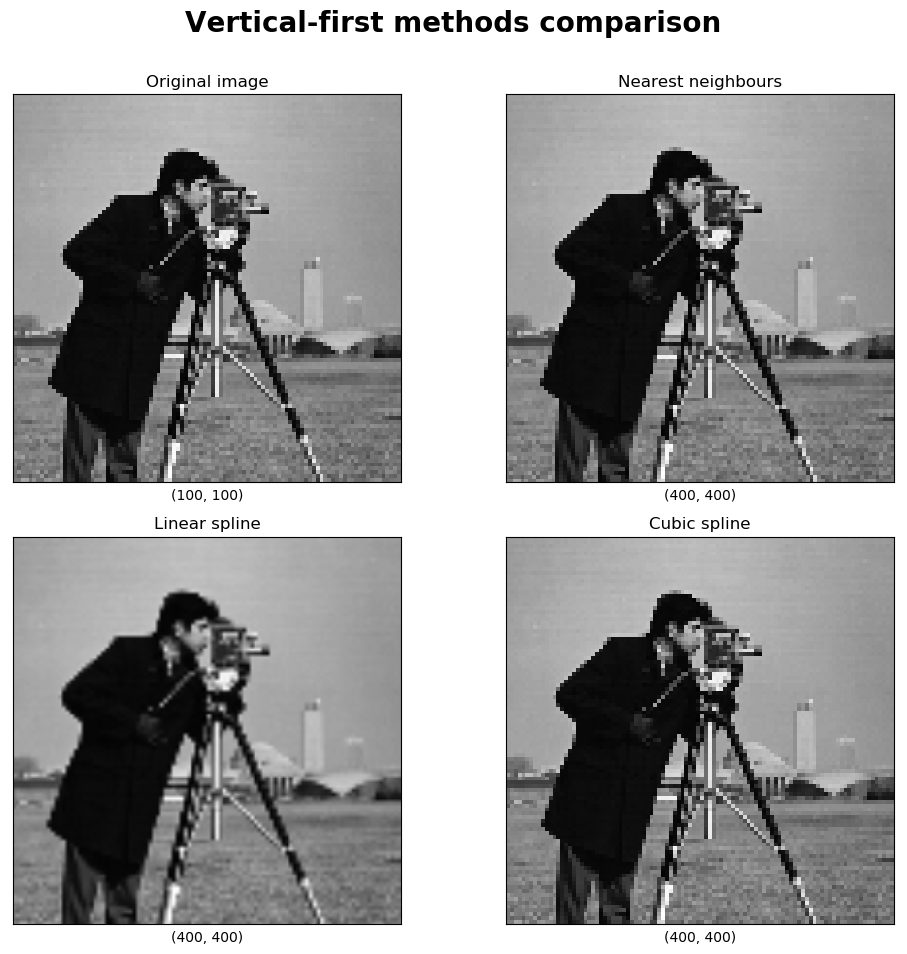

In [5]:
img = testimage("cameraman")
# Cameraman default resolution is 512x512
img = imresize(img, (100, 100))
test_and_plot_results(img, 400, 400)